#Import Library

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import pickle

#Data Understanding

## Import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dirty_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Height,Weight,Settlement size,Parents name
0,100000001,male,single,67,university,124670.0,staff,173.0,82.0,big city,Martin
1,100000002,female,non-single,22,high school,150773.0,staff,144.0,60.0,big city,Ann
2,100000003,male,single,49,high school,89210.0,unemployed,164.0,63.0,small city,Matt
3,100000004,male,single,45,NaN,171565.0,staff,144.0,46.0,mid-size city,Lothor
4,100000005,male,single,53,high school,149031.0,staff,160.0,53.0,mid-size city,Samuel


# Data Preprocessing

## Data Description

In [ ]:
#mendeskripsikan data mulai dari jumlah, persebaran data, nilai maksimal dan minimal, juga pemusatan data
df.describe()

#diketahui adanya inkonsistensi jumlah data, adapun nilai maksimal umur yang tidak logis

,ID,Age,Income,Height,Weight
count,2.002000e+03,2002.000000,2001.000000,2001.000000,2001.000000
mean,1.000010e+08,36.166833,120937.274863,164.445277,62.469265
std,5.774487e+02,14.661128,38107.013973,14.519405,14.285103
min,1.000000e+08,18.000000,35832.000000,140.000000,35.000000
25%,1.000005e+08,27.000000,97613.000000,152.000000,51.000000
50%,1.000010e+08,33.000000,115531.000000,164.000000,62.000000
75%,1.000015e+08,42.000000,138011.000000,177.000000,73.000000
max,1.000020e+08,400.000000,309364.000000,189.000000,90.000000


## Describe Missing Value

In [ ]:
#return informasi data -> include nama kolom, jumlah data, dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2002 non-null   int64  
 1   Sex              2002 non-null   object 
 2   Marital status   2002 non-null   object 
 3   Age              2002 non-null   int64  
 4   Education        1891 non-null   object 
 5   Income           2001 non-null   float64
 6   Occupation       2001 non-null   object 
 7   Height           2001 non-null   float64
 8   Weight           2001 non-null   float64
 9   Settlement size  2002 non-null   object 
 10  Parents name     2001 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 172.2+ KB


In [ ]:
#jumlah data kosong
df.isnull().sum()

ID                   0
Sex                  0
Marital status       0
Age                  0
Education          111
Income               1
Occupation           1
Height               1
Weight               1
Settlement size      0
Parents name         1
dtype: int64

In [ ]:
#membulatkan data kosong menjadi presentase
round(df.isnull().sum()/df.shape[0]*100,2)

ID                 0.00
Sex                0.00
Marital status     0.00
Age                0.00
Education          5.54
Income             0.05
Occupation         0.05
Height             0.05
Weight             0.05
Settlement size    0.00
Parents name       0.05
dtype: float64

In [ ]:
df.shape

(2002, 11)

### Menghapus Nilai yang Tidak Logis

In [ ]:
#mencari tahu selain nilai maksimal umur, apakah ada lagi umur dengan angka tidak normal
df.sort_values(by=['Age'], ascending=False)

#diketahui selain umur 400, adapula umur 188 yang tidak logis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Height,Weight,Settlement size,Parents name
1621,100001620,female,non-single,400,NaN,86649.0,unemployed,143.0,69.0,small city,Samuel
1422,100001422,female,non-single,188,NaN,NaN,NaN,NaN,NaN,mid-size city,NaN
1064,100001065,female,non-single,76,graduate school,170366.0,manager,152.0,63.0,mid-size city,Jennifer
330,100000331,male,single,75,university,213333.0,manager,164.0,57.0,mid-size city,Jennifer
536,100000537,female,non-single,75,graduate school,170113.0,manager,154.0,52.0,mid-size city,Roozan
...,...,...,...,...,...,...,...,...,...,...,...
633,100000634,female,non-single,19,high school,101258.0,staff,184.0,43.0,small city,Roozan
1307,100001308,female,non-single,19,high school,99119.0,staff,152.0,46.0,small city,Jennifer
1160,100001161,male,non-single,18,high school,98992.0,staff,156.0,61.0,mid-size city,Martin
1821,100001820,female,non-single,18,high school,100924.0,staff,161.0,51.0,small city,Samuel


In [ ]:
#persiapan variabel baru yang menampung duplikasi dataset, sehingga ketika ada perubahan tidak akan mengubah data aslinya
df_cleaned = df.copy()

In [ ]:
#diketahui pada data dengan umur 400 dan 188, terdapat data kosong -> row kedua data dapat dihapus
df_cleaned.drop(df_cleaned.loc[df_cleaned['Age']>=188].index, inplace=True)

In [ ]:
#mengecek kembali apakah data sudah terhapus
df_cleaned.sort_values(by=['Age'], ascending=False)

#diketahui data dengan umur lebih dari sama dengan 188 (188 dan 400) sudah terhapus

,ID,Sex,Marital status,Age,Education,Income,Occupation,Height,Weight,Settlement size,Parents name
1064,100001065,female,non-single,76,graduate school,170366.0,manager,152.0,63.0,mid-size city,Jennifer
536,100000537,female,non-single,75,graduate school,170113.0,manager,154.0,52.0,mid-size city,Roozan
330,100000331,male,single,75,university,213333.0,manager,164.0,57.0,mid-size city,Jennifer
756,100000757,male,single,74,university,89502.0,unemployed,179.0,57.0,small city,Andrew
606,100000607,male,single,74,university,192481.0,manager,189.0,87.0,mid-size city,Ann
...,...,...,...,...,...,...,...,...,...,...,...
1354,100001355,female,non-single,19,high school,99519.0,staff,151.0,75.0,mid-size city,Martin
1307,100001308,female,non-single,19,high school,99119.0,staff,152.0,46.0,small city,Jennifer
1821,100001820,female,non-single,18,high school,100924.0,staff,161.0,51.0,small city,Samuel
1160,100001161,male,non-single,18,high school,98992.0,staff,156.0,61.0,mid-size city,Martin


In [ ]:
#mengecek presentase data
round(df_cleaned.isnull().sum()/df_cleaned.shape[0]*100,2)

ID                 0.00
Sex                0.00
Marital status     0.00
Age                0.00
Education          5.45
Income             0.00
Occupation         0.00
Height             0.00
Weight             0.00
Settlement size    0.00
Parents name       0.00
dtype: float64

In [ ]:
df_cleaned.info()

#diketahui jumlah data yang sebelumnya ada 2002 menjadi 2000 dengan penghapusan dua data berdasarkan umur 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   int64  
 1   Sex              2000 non-null   object 
 2   Marital status   2000 non-null   object 
 3   Age              2000 non-null   int64  
 4   Education        1891 non-null   object 
 5   Income           2000 non-null   float64
 6   Occupation       2000 non-null   object 
 7   Height           2000 non-null   float64
 8   Weight           2000 non-null   float64
 9   Settlement size  2000 non-null   object 
 10  Parents name     2000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 187.5+ KB


### Mengisi Data Kosong Pada Field Kategorik dengan Modus

In [ ]:
#diketahui pada field education terdapat 111 data yang hilang

#melihat isi dari field edukasi
df_cleaned['Education'].unique()

#field education merupakan kategorik -> sehingga data yang hilang dapat diisi dengan modus

array(['university', 'high school', nan, 'other', 'graduate school'],
      dtype=object)

In [ ]:
#melakukan deskripsi variabel modus yang diisi dengan modus dari field education
modus = df_cleaned['Education'].mode()[0]

In [ ]:
#pengisian nilai modus pada 111 data dengan nilai kosong pada field education
df_cleaned['Education'] = df_cleaned['Education'].fillna(modus)

In [ ]:
#mengecek kembali jumlah data kosongnya
df_cleaned.info()

#diketahui data kosong sudah terisi dan semua kolom memiliki data sejumlah 2000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   int64  
 1   Sex              2000 non-null   object 
 2   Marital status   2000 non-null   object 
 3   Age              2000 non-null   int64  
 4   Education        2000 non-null   object 
 5   Income           2000 non-null   float64
 6   Occupation       2000 non-null   object 
 7   Height           2000 non-null   float64
 8   Weight           2000 non-null   float64
 9   Settlement size  2000 non-null   object 
 10  Parents name     2000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 187.5+ KB


In [ ]:
#mengecek presentase data
round(df_cleaned.isnull().sum()/df_cleaned.shape[0]*100,2)

#diketahui seluruh data sudah normal 

ID                 0.0
Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Height             0.0
Weight             0.0
Settlement size    0.0
Parents name       0.0
dtype: float64

## Mengecek Duplikasi Data

In [ ]:
df_cleaned.duplicated().any()

#there's no duplicates

False

## Mengubah Data Unik Pada Field Kategorik Menjadi Numerik

In [ ]:
df_cleaned['Sex'].replace(['male','female'],[0,1], inplace=True)
df_cleaned['Marital status'].replace(['single','non-single'], [0,1], inplace=True)
df_cleaned['Education'].replace(['other','high school', 'university','graduate school'], [0,1,2,3], inplace=True)
df_cleaned['Occupation'].replace(['unemployed', 'staff','manager'], [0,1,2], inplace=True)
df_cleaned['Settlement size'].replace(['small city','mid-size city','big city'], [0,1,2], inplace=True)

df_cleaned.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Height,Weight,Settlement size,Parents name
0,100000001,0,0,67,2,124670.0,1,173.0,82.0,2,Martin
1,100000002,1,1,22,1,150773.0,1,144.0,60.0,2,Ann
2,100000003,0,0,49,1,89210.0,0,164.0,63.0,0,Matt
3,100000004,0,0,45,1,171565.0,1,144.0,46.0,1,Lothor
4,100000005,0,0,53,1,149031.0,1,160.0,53.0,1,Samuel


## Menghapus Kolom yang Tidak Diperlukan

In [ ]:
df_cleaned.drop(columns= ['Height','Weight','Parents name'], inplace=True)

In [ ]:
df_cleaned.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670.0,1,2
1,100000002,1,1,22,1,150773.0,1,2
2,100000003,0,0,49,1,89210.0,0,0
3,100000004,0,0,45,1,171565.0,1,1
4,100000005,0,0,53,1,149031.0,1,1


## Merubah ID menjadi Index Data

In [ ]:
df_cleaned = df_cleaned.set_index('ID')
df_cleaned.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670.0,1,2
100000002,1,1,22,1,150773.0,1,2
100000003,0,0,49,1,89210.0,0,0
100000004,0,0,45,1,171565.0,1,1
100000005,0,0,53,1,149031.0,1,1


# Exploratory Data Analysis (EDA)

## Correlation Matrix of Customers

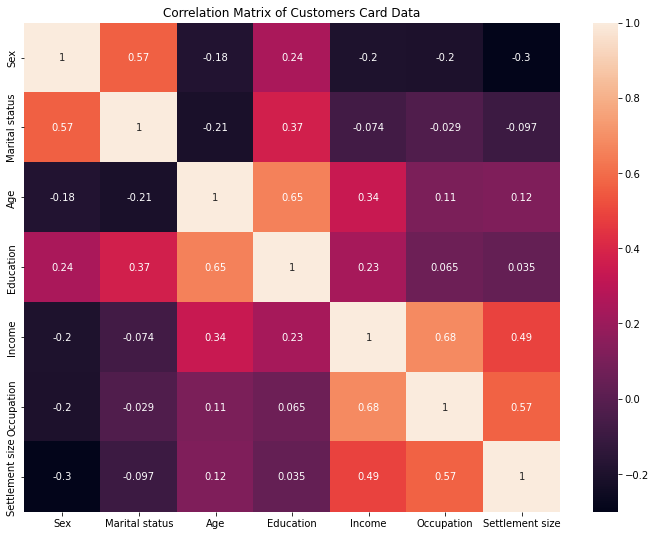

In [ ]:
#correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(df_cleaned.corr(), annot = True)
plt.title('Correlation Matrix of Customers Card Data')
plt.show()

## Extent Correlation Between Age and Income

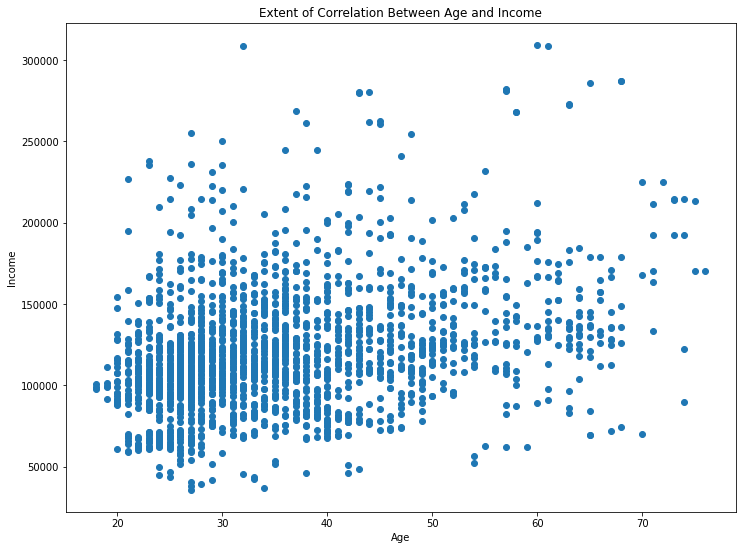

In [ ]:
#scatter plot of age and income
plt.figure(figsize=(12,9))
plt.scatter(df_cleaned['Age'], df_cleaned['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Extent of Correlation Between Age and Income')
plt.show()

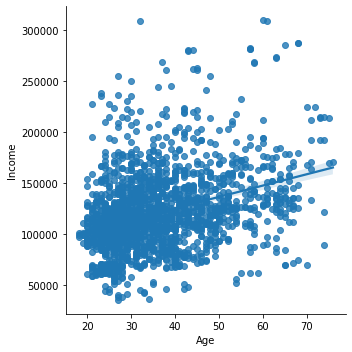

In [ ]:
sns.lmplot('Age', 'Income', data = df_cleaned)

# K-Means Implementation

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_2 = scaler.fit_transform(df_cleaned)
df_2

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
#Centroid Inilization
centroid = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
  kmeans.fit(df_2)
  centroid.append(kmeans.inertia_)

In [ ]:
centroid
#centroid is a data point (discrete unit of information) that represents the center of the cluster (the mean)

[14000.0,
 10514.558847734443,
 8630.913216898227,
 7169.87082246584,
 6403.134167928612,
 5830.9563029611545,
 5378.854705323012,
 5005.134609766622,
 4724.527779695852,
 4295.656622405144]

Text(0.5, 1.0, 'Elbow Point')

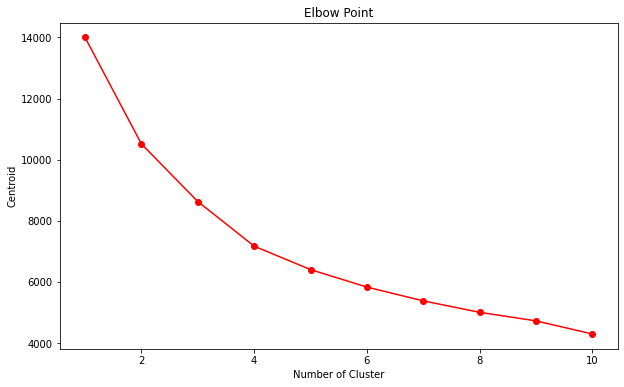

In [ ]:
#Finding the value of K 
plt.figure(figsize=(10,6))
plt.plot(range(1,11), centroid, marker = 'o', color='red')
plt.xlabel('Number of Cluster')
plt.ylabel('Centroid')
plt.title('Elbow Point')

#choosing the K value at which an increase will cause a very small decrease in the error sum
#while a decrease will sharply increase the error sum
#elbow point -> point that defines the optimal number of clusters 
#based on this fig, we know that the elbow point is on 4

In [ ]:
#Clustering with K-Means
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = 42)

In [ ]:
kmeans.fit(df_2)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_result = df_2.copy()
df_result = pd.DataFrame(data = df_2, columns = df_cleaned.columns)

In [ ]:
#Expanding the Data into Segmentation with Number
df_result['Segmentation'] = kmeans.labels_
df_result

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segmentation
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3
...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,1
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,2
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,1
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,2


In [ ]:
#Segmentation Analysis
df_analysis = df_result.groupby(['Segmentation']).mean()
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segmentation,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


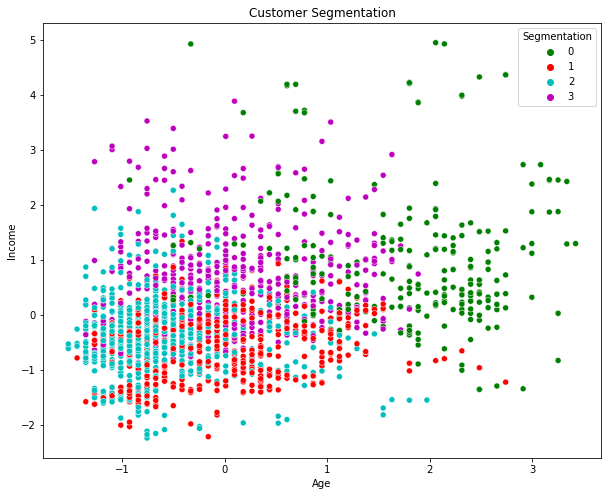

In [ ]:
#visualizing in scatter plot
x_axis = df_result['Age']
y_axis = df_result['Income']
plt.figure(figsize = (10,8))
plt.title('Customer Segmentation')
sns.scatterplot(x_axis, y_axis, hue=df_result['Segmentation'], palette = ['g','r','c','m'])